<h1>Step 1: Introduction to OpenAI Gym or similar:</h1>

OpenAI Gym is a toolkit for developing and comparing reinforcement learning algorithms. It provides a wide variety of environments where agents can be trained to learn and perform tasks. These environments range from simple grid-world games to complex simulated physics environments.

<h3>a. Installation:</h3>
- OpenAI Gym can be installed using pip:<br/>

In [1]:
!pip install wheel setuptools pip --upgrade # make sure we have the latest pip

In [2]:
!pip install swig gym # needed for box2d
!pip install gymnasium # install gym
!pip install 'gymnasium[all]' # install all environments
!pip install 'gymnasium[box2d]' # install box2d environments

<b>!pip install swig:</b> This command is used to install the SWIG library. SWIG is a software development tool that connects programs written in C and C++ with a variety of high-level programming languages. It's needed for the box2d environment in gym.

<b>!pip install gymnasium:</b> This command is used to install the gymnasium library. Gymnasium is a toolkit for developing and comparing reinforcement learning algorithms.

<b>!pip install 'gymnasium[all]':</b> This command is used to install all environments provided by the gymnasium library.

<b>!pip install 'gymnasium[box2d]':</b> This command is used to install box2d environments provided by the gymnasium library. Box2D is a 2D physics engine for games.

In [3]:
!pip install matplotlib 
!pip install numpy
!pip install seaborn
!pip install tqdm

<h3>b. Environments:</h3>
OpenAI Gym provides a collection of environments, each representing a different task or problem.
Environments are instantiated using the <i>gym.make()</i> function, passing the name of the environment as an argument.

In [4]:
import gymnasium as gym
from tqdm import tqdm
from IPython.display import display, clear_output
import time
import numpy as np
import matplotlib.pyplot as plt

In [5]:
 desc=["SFFF", 
       "FHFH", 
       "FFFH", 
       "HFFG"]

<h3>c. Basic Methods:</h3>
<b>reset():</b> This method resets the environment to its initial state and returns the initial observation.

<b>step():</b> This method takes an action as input, executes the action in the environment, and returns 5 values: `observation, reward, terminated, truncated and info`. <br>
`observation:` The observation of the environment after taking the action.<br>
`reward:` The reward obtained from taking the action.<br>
`terminated and truncated:` flags indicating whether the episode has ended `(terminated)` or been cut short `(truncated)`,<br>
`info:` Additional information about the environment (usually used for debugging or analysis).<br>

In [6]:
env = gym.make('FrozenLake-v1', desc=desc, map_name="4x4", is_slippery=True, render_mode="human")
observation, info = env.reset()

for _ in tqdm(range(200)):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    print(f'reward = {reward} terminated = {terminated} truncated = {truncated} {info}')
    if terminated or truncated:
        observation, info = env.reset()
    clear_output(wait=True)
    time.sleep(0.1)
env.close()

100%|█████████████████████████████████████████| 200/200 [00:55<00:00,  3.59it/s]


<h3>d. Environment Attributes:</h3>

`observation_space:`The observation space of the environment, representing the possible states the environment can be in.<br>
`action_space:` The action space of the environment, representing the possible actions that the agent can take.<br>
`render_mode:` that specifies how the environment should be visualised.

<h1>Step 2: Exploring Markov Decision Processes (MDP)</h1>

<h3>FrozenLake-v1 as an MDP</h3>

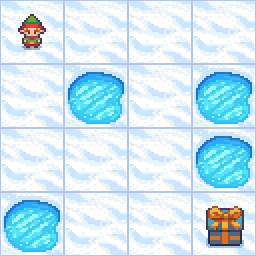

FrozenLake-v1 is a classic reinforcement learning environment provided by OpenAI Gym. It simulates a grid-world environment where an agent navigates through a frozen lake to reach a goal tile while avoiding holes.

<h3>Understanding FrozenLake as an MDP</h3>

<h3> a. States </h3>
In the FrozenLake-v1 environment, each tile in the grid represents a state. The state is determined by the agent's position on the grid. For a standard 4x4 grid, there are 16 states (0 to 15), each corresponding to a position on the grid.

<h3> b. Actions </h3>
The agent has four possible actions in this environment:<br>
<ul>
    <li>0: Move left</li>
    <li>1: Move down</li>
    <li>2: Move right</li>
    <li>3: Move up</li>
</ul>
These actions determine the direction the agent attempts to move from its current state.

<h3>c. Rewards</h3>
The reward structure is simple:
<ul>
    <li>0 reward for all transitions except for those leading to the goal.</li>
    <li>1 reward is given when reaching the goal state.</li>
    <li>0 reward and the episode ends if the agent falls into a hole.</li>
</ul>


<h3>d. Transitions</h3>
The transitions between states are not deterministic. There is a probability that the agent will slip and move in a direction orthogonal to the intended direction due to the "icy" nature of the lake. This stochastic behavior exemplifies the uncertainty in decision-making in an MDP.

In [7]:
# Create the environment
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=True, render_mode="human")

# Print the state space and action space
print("Number of states:", env.observation_space.n)
print("Number of actions:", env.action_space.n)

# Transition probabilities (for a specific state and action)
state = 14  # Example state
action = 2  # Example action (move right)

# Analyze transitions from the example state using the chosen action
print("\nPossible transitions from state {} using action {}:".format(state, action))
for next_state in range(env.observation_space.n):
    prob, next_state, reward, done = env.unwrapped.P[state][action][0]  # Retrieve transition info
    print(f"Transition to state {next_state} with probability {prob}, reward {reward}, and done {done}")

Number of states: 16
Number of actions: 4

Possible transitions from state 14 using action 2:
Transition to state 14 with probability 0.3333333333333333, reward 0.0, and done False
Transition to state 14 with probability 0.3333333333333333, reward 0.0, and done False
Transition to state 14 with probability 0.3333333333333333, reward 0.0, and done False
Transition to state 14 with probability 0.3333333333333333, reward 0.0, and done False
Transition to state 14 with probability 0.3333333333333333, reward 0.0, and done False
Transition to state 14 with probability 0.3333333333333333, reward 0.0, and done False
Transition to state 14 with probability 0.3333333333333333, reward 0.0, and done False
Transition to state 14 with probability 0.3333333333333333, reward 0.0, and done False
Transition to state 14 with probability 0.3333333333333333, reward 0.0, and done False
Transition to state 14 with probability 0.3333333333333333, reward 0.0, and done False
Transition to state 14 with probabil

In [8]:
# Function to plot values
def plot_values(V):
    """
    Plots a graph of the input values.

    Parameters:
    V (list or array-like): A list or array of values to be plotted.

    The function plots the values in V against their index, labeling the x-axis as 'Turn'
    and the y-axis as 'Time (sec)'. The plot includes grid lines for better readability.
    """
    # Set the figure size
    plt.figure(figsize=(8, 6))

    # Plot the values in V
    plt.plot(V)

    plt.title('State Value Function Convergence')
    plt.xlabel('Itr')
    plt.ylabel('delta')

    # Enable grid lines
    plt.grid(True)

    # Display the plot
    plt.show()

<h1> 03. Implementing Value Iteration for FrozenLake-v1</h1>

Value Iteration is an algorithm used to find the optimal state value function in a Markov Decision Process. In this method, the optimal policy is obtained by iteratively computing the optimal state value function V(s) for each state until it converges. In this method policy function in not computed explicitly during iteration, rather optimal state value function is computed by choosing the action that maximizes Q value for a given state. Here's how we can implement it for the FrozenLake-v1 environment:

In [9]:
# Import necessary libraries
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt
import numpy as np
import time

env = gym.make('FrozenLake-v1')

In [10]:
def value_iteration(env, gamma=1.0):
    # Initialize value table with zeros
    value_table = np.zeros(env.observation_space.n)
    
    # Set number of iterations and threshold
    no_of_iterations = 100000
    threshold = 1e-20
    delta = []
    
    for i in range(no_of_iterations):
        # On each iteration, copy the value table to the updated_value_table
        updated_value_table = np.copy(value_table) 
        
        # Calculate Q Value for each action in the state and update the value of a state with maximum Q value
        for state in range(env.observation_space.n):
            Q_value = []
            for action in range(env.action_space.n):
                next_states_rewards = []
                for next_sr in env.P[state][action]: 
                    trans_prob, next_state, reward_prob, _ = next_sr 
                    next_states_rewards.append((trans_prob * (reward_prob + gamma * updated_value_table[next_state]))) 
                
                Q_value.append(np.sum(next_states_rewards))
                
            value_table[state] = max(Q_value) 
        
        # Calculate the difference between value tables
        delta.append(np.sum(np.fabs(updated_value_table - value_table)))
        
        # Check convergence
        if np.sum(np.fabs(updated_value_table - value_table)) <= threshold:
             print('Value-iteration converged at iteration# %d.' % (i+1))
             break
    
    return value_table, delta

In [11]:
def extract_policy(value_table, gamma=1.0):
    # Initialize the policy with zeros
    policy = np.zeros(env.observation_space.n)
    
    for state in range(env.observation_space.n):
        # Initialize the Q table for a state
        Q_table = np.zeros(env.action_space.n)
        
        # Compute Q value for all actions in the state
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))
        
        # Select the action which has maximum Q value as an optimal action of the state
        policy[state] = np.argmax(Q_table)
    
    return policy

Value-iteration converged at iteration# 1373.
Optimal Policy:
[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


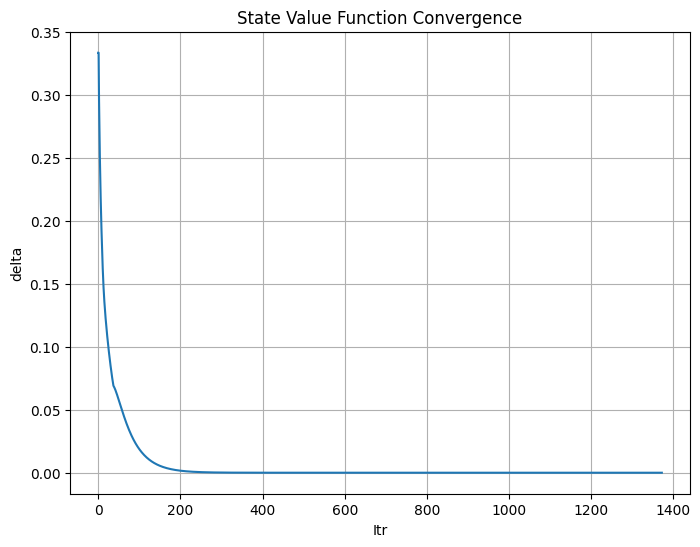

In [12]:
# Perform value iteration to obtain the optimal value function and delta values
optimal_value_function, delta = value_iteration(env=env, gamma=1.0)

# Extract the optimal policy based on the optimal value function
optimal_policy = extract_policy(optimal_value_function, gamma=1.0)

# Print the optimal policy
print("Optimal Policy:")
print(optimal_policy)

# Plot the change in delta values over iterations
plot_values(delta)

<h1> Step 4: Implementing Q-Learning in FrozenLake-v1</h1>

Q-Learning is a popular model-free reinforcement learning algorithm that learns the value of an action in a particular state without requiring a model of the environment. 

In [13]:
def initialize_environment(random_map):
    """
    Initialize the environment and Q-table.

    Args:
        random_map (2D array): Randomly generated map for the FrozenLake environment.

    Returns:
        env: Initialized FrozenLake environment.
        q_table: Initialized Q-table with zeros.
    """
    env = gym.make('FrozenLake-v1', desc=random_map, is_slippery=True)
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    return env, q_table

In [19]:
def q_learning_training(environment, q_values, num_episodes, max_steps_per_episode, learning_rate, discount_factor, initial_exploration_rate, max_exploration_rate, min_exploration_rate, exploration_decay_rate):
    """
    Train an agent using the Q-learning algorithm.

    Args:
        environment: Initialized environment.
        q_values (2D array): Q-table initialized with zeros.
        num_episodes (int): Total number of episodes for training.
        max_steps_per_episode (int): Maximum number of steps per episode.
        learning_rate (float): Learning rate.
        discount_factor (float): Discount factor.
        initial_exploration_rate (float): Initial exploration rate.
        max_exploration_rate (float): Maximum exploration rate.
        min_exploration_rate (float): Minimum exploration rate.
        exploration_decay_rate (float): Rate of decay for exploration rate.

    Returns:
        q_values (2D array): Updated Q-table after training.
        rewards_per_episode (list): List of rewards obtained in each episode during training.
    """
    rewards_per_episode = []  # List to store rewards for each episode

    exploration_rate = initial_exploration_rate  # Set the initial exploration rate

    for episode in range(num_episodes):
        current_state = environment.reset()  # Reset environment to start state
        total_episode_reward = 0  # Initialize total reward for the episode

        for step in range(max_steps_per_episode):
            # Decide whether to explore or exploit
            if np.random.rand() > exploration_rate:
                action = np.argmax(q_values[current_state, :])  # Exploit: choose action with max Q-value
            else:
                action = environment.action_space.sample()  # Explore: choose a random action

            # Execute the chosen action
            next_state, reward, done, _ = environment.step(action)

            # Update Q-value using the Q-learning formula
            best_future_q = np.max(q_values[next_state, :])
            q_values[current_state, action] = (q_values[current_state, action] + 
                                                learning_rate * (reward + discount_factor * best_future_q - q_values[current_state, action]))

            current_state = next_state  # Move to the next state
            total_episode_reward += reward  # Accumulate the reward

            if done:
                break  # End the episode if done

        # Decay the exploration rate
        exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
        rewards_per_episode.append(total_episode_reward)  # Store the total reward for this episode

    return q_values, rewards_per_episode


In [23]:
def evaluate_q_learning_agent(environment, q_values, num_eval_episodes, max_steps_per_episode=96):
    """
    Evaluate the trained Q-learning agent.

    Args:
        environment: Initialized environment.
        q_values (2D array): Trained Q-table.
        num_eval_episodes (int): Total number of episodes for evaluation.
        max_steps_per_episode (int): Maximum number of steps per evaluation episode.

    Returns:
        successful_episodes (int): Number of episodes where the agent successfully reached the goal state.
    """
    successful_episodes = 0  # Initialize count for successful episodes

    for episode in range(num_eval_episodes):
        current_state = 0, 0, False
        step_count = 0
        episode_terminated = False

        while not episode_terminated:
            # Choose the best action from Q-table
            best_action = np.argmax(q_values[current_state, :])
            next_state, reward, done, truncated, _ = environment.step(best_action)

            if done or truncated:
                # Check if the goal state is reached (assuming goal state is 15)
                if next_state == 15:
                    successful_episodes += 1
                break

            if step_count >= max_steps_per_episode:
                break

            current_state = next_state
            step_count += 1

    environment.close()
    return successful_episodes

In [29]:
def plotQ(reward):
    plt.figure(figsize=(8, 4))
    plt.grid(True)
    plt.title('Q-Learning Training')
    plt.legend(['Average Reward per Episode'])
    plt.ylabel('Reward')
    plt.xlabel('Episodes')
    plt.plot(reward)
    plt.show()

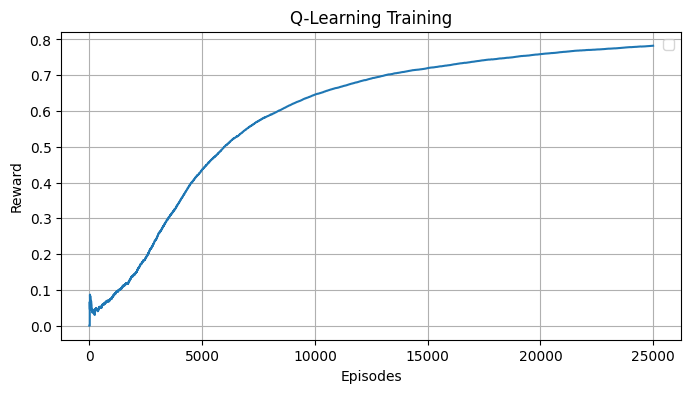

In [33]:
if __name__ == '__main__':
    # Define hyperparameters
    max_epsilon = 1.0
    total_episodes = 25000
    max_steps = 96
    gamma = 0.9  # Discount factor
    decay_rate = 0.001
    epsilon = 1.0  # Exploration rate
    alpha = 0.75  # Learning rate
    min_epsilon = 0.01

    # Generate a random map for the FrozenLake environment
    random_map = generate_random_map(size=4, p=0.6)
    
    # Initialize environment and Q-table
    env, qtable = initialize_environment(random_map)
    
    # Train the agent
    qtable, rewards = train_agent(env, qtable, total_episodes, max_steps, alpha, gamma, epsilon, max_epsilon, min_epsilon, decay_rate)

    # Evaluate the trained agent
    evaluate_q_learning_agent(env, qtable, 1000)

    # Plot cumulative average rewards
    cum_avg_rewards = np.cumsum(rewards) / np.arange(1, total_episodes + 1)
    plotQ(cum_avg_rewards)